# Project Human Pose  Estimation using open cv

In [2]:
# The libraries need for humnan pose 

import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns

In F:\INSTALLERS\ananconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\INSTALLERS\ananconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\INSTALLERS\ananconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In F:\INSTALLERS\ananconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In F:\INSTALLERS\ananconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

# for human i have taken built tensor flow graph 

In [8]:
# i have pasted the graph in folder where iam builing my project so to import it we need os 
import os
os.chdir(r'c:\users\harika\downloads\human')

In [9]:
# GRAPH IS NOTING BUT WEIGHTS ARE ASSIGNED FOR BODY PARTS
n = cv.dnn.readNetFromTensorflow('graph_opt.pb')

In [19]:
 # WIDTH  AND HEIGHT WEN CAN RESIZE THEM 
    
wid = 368
hgt =  368
thr= 0.3 # THRESHOLD VALUE FOR POSE PARTS HEATMAP



In [20]:
# BODY PARTS I HAVE TAKEN TO IDENTIFY

bodyparts = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13,"Background": 14 }

poseparts = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"]]


In [21]:
# LOADING IMAGE

im = cv.imread('image.jpg')

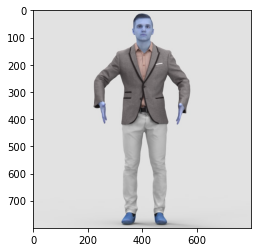

In [22]:
# IMAGE ISS IMPORTED IN BLUE COLOR 
plt.imshow(im)

In [23]:
# SO WE NEED TO CONVERT TO RGB

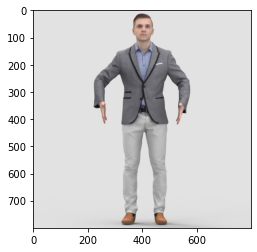

In [24]:
plt.imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))

In [25]:
# WE NEED FUNCTION TO IDENTIFY POSE


In [26]:
def pose(frame):
    framewidth = frame.shape[1]
    frameheight = frame.shape[0]
    n.setInput(cv.dnn.blobFromImage(frame,1.0, (wid, hgt),(127.5,127.5,127.5), swapRB=True, crop=False))

    out = n.forward()
    out = out[:, :15, :, :] 

    assert(len(bodyparts) == out.shape[1])

    points = []
    for i in range(len(bodyparts)):
        heatMap = out[0, i, :, :]

   
    #  we try to find all the local maximums joints. To simplify a sample
    # we just find a global one. However only a single pose at the same time
    # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (framewidth * point[0]) / out.shape[3]
        y = (frameheight * point[1]) / out.shape[2]
   
        points.append((int(x), int(y)) if conf > thr else None)

    # now we will indentify points 
   
    for pair in poseparts:  
        partfrom = pair[0]
        partto = pair[1]
        assert(partfrom in bodyparts)
        assert(partto in bodyparts)

        idfrom = bodyparts[partfrom]
        idto = bodyparts[partto]

        
        # now we will join the points we identified and draw a line



        if points[idfrom] and points[idto]:
            cv.line(frame, points[idfrom], points[idto], (255, 255, 255), 3)# we can choose a color to draw
            cv.ellipse(frame, points[idfrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED) # value for points color
            cv.ellipse(frame, points[idto], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = n.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    return frame

In [27]:
estimate_image =pose(im)

In [ ]:
df.fillna(method='')

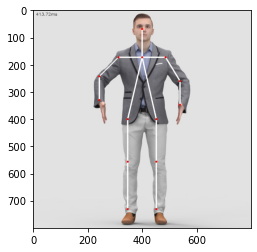

In [28]:
plt.imshow(cv.cvtColor(estimate_image, cv.COLOR_BGR2RGB))

In [29]:
 # WIDTH  AND HEIGHT WEN CAN RESIZE THEM 
    
wid = 1080
hgt =  720
thr= 0.3 # THRESHOLD VALUE FOR POSE PARTS HEATMAP


In [11]:
# we can step up for web cam by setting cap = cv.VideoCapture(0) or 1 for attached cam


cap = cv.VideoCapture('sets.webm')


if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open')


while cv.waitKey(1) <0 :
    hasframe, frame = cap.read()
    if not hasframe:
        cv.waitKey()
        break


    framewidth = frame.shape[1]
    frameheight = frame.shape[0]
    n.setInput(cv.dnn.blobFromImage(frame,1.0, (wid, hgt),(127.5,127.5,127.5), swapRB=True, crop=False))

    out = n.forward()
    out = out[:, :15, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(bodyparts) == out.shape[1])

    points = []
    for i in range(len(bodyparts)):
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (framewidth * point[0]) / out.shape[3]
        y = (frameheight * point[1]) / out.shape[2]
        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in poseparts:
        partfrom = pair[0]
        partto = pair[1]
        assert(partfrom in bodyparts)
        assert(partto in bodyparts)

        idfrom = bodyparts[partfrom]
        idto = bodyparts[partto]

        if points[idfrom] and points[idto]:
            cv.line(frame, points[idfrom], points[idto], (255, 255, 255), 3)
            cv.ellipse(frame, points[idfrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idto], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = n.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    cv.imshow('OpenPose using OpenCV', frame)


NameError: name 'wid' is not defined